# Hypothesis Testing Exercise

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

    Has the network latency gone up since we switched internet service providers?
    
    Is the website redesign any good?
    
    Is our television ad driving more sales?


## Has the network latency gone up since we switched internet service providers?


Null Hypothesis: The new internet service provider has slower internet speeds than our previous provider


Alternative Hypothesis: The new internet service provider is as fast(or faster) than our previous provider


    True Positive: We compared the results of speed test to confirm that out new internet provider does in fact have slower interent speed

    True Negative: Comparing the results of speed test, we confirm that our new internet provider is in fact giving us faster internet speeds

    Type I Error: The new internet provider does provide faster speeds, however this is not percieved as the router we use has a defect.  This misleads us into believing the old service provider was faster

    Type II Error: The new internet service provider is percieved to be faster than our older service, when in fact our old service just needed an updated router to provide faster internet speeds


## Is the website redesign any good?


Null Hypothesis: The new web design will attract more traffic to the website than the previous design, confirming its quality.


Alternative Hypothesis: The new wed design does not attract as much traffic to the site, therefore the redesign was not successful.


    True Positive: Once the new design was up and running, we documented an instant increase in website traffic

    True Negative: Once the new design was up and running, we documented no noticable jump in website traffic and perhaps even a decrease in traffic

    Type I Error: An influx of bots designed to click thru newly designed sites leads us to percieve a successful launch of our new web design

    Type II Error: When we launched the new web design, an unrelated blackout prevented a larger part of our base to be unable to access it.  We percieve this as an unsuccessful redesign launch 


## Is our television ad driving more sales?


Null Hypothesis: There was an increase in sales after the airing of our television ad


Alternative Hypothesis: There was no noticable impact on sales after the airing of our television ad.


    True Positive: Our sales see a 20% increase after the airing of the ad

    True Negative: Our sales continue to stagnate after airing the ad.

    Type I Error: We had a particularly good week of sales following the ad, but purely due to chance.

    Type II Error: Our sales do not increase after airing the ad, but this is due to mistyped address and people just cant find your location


# T-testing Exercise 1



  Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [68]:
import numpy as np
import pandas as pd
import env
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

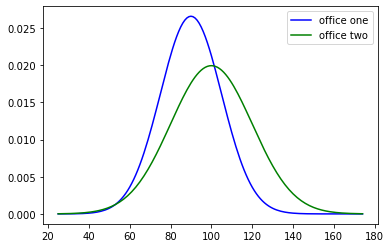

In [55]:

sample = 40 #sales
mean_one = 90 #days
std_dev_one = 15 #days


sample = 50 #sales
mean_two = 100
std_dev_two = 20 #days
α = .05

# Null Hypothesis
#  office_one avg time to sell = office_two avg time to sell

# Alt Hypothesis
#  office_one avg time to sell != office_two avg time to sell

x = np.arange(25, 175)

off_one = stats.norm(90, 15).pdf(x)
off_two = stats.norm(100, 20).pdf(x)

plt.plot(x, off_one, label='office one', color='b')
plt.plot(x, off_two, label='office two', color='g')

plt.legend()

In [56]:
off_one.var() == off_two.var()

False

In [71]:
# nope ----t, p = stats.ttest_ind(off_one, off_two)

t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)

t, p, α

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [72]:
if (p < α) == True:
    print('We can reject the null hypothesis, and conclude that the two offices sell homes at different rates.')

We can reject the null hypothesis, and conclude that the two offices sell homes at different rates.


# T-testing Exercise 2


 ### Load the mpg dataset and use it to answer the following questions:
    
        Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
        
        Are compact cars more fuel-efficient than the average car?
        
        Do manual cars get better gas mileage than automatic cars?


In [73]:
from pydataset import data

mpg = data('mpg')

mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### Part 1
### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [66]:
# Null Hypothesis
#  2008 fuel-efficiency = 1999 fuel_efficiency 

# Alt Hypothesis
#   2008 fuel-efficiency != 1999 fuel_efficiency 

mpg['fuel_efficiency'] = (mpg.cty + mpg.cty) / 2

fe_1999 = mpg[mpg.year == 1999].fuel_efficiency
fe_2008 = mpg[mpg.year == 2008].fuel_efficiency

<AxesSubplot:>

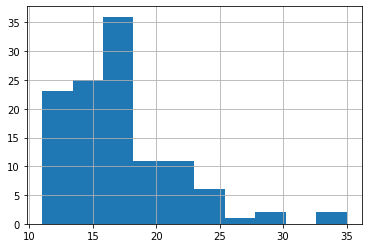

In [67]:
#  graph to help visualize distribution 

fe_1999.hist()

<AxesSubplot:>

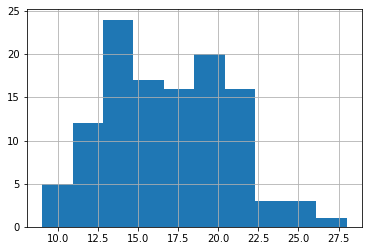

In [62]:
# graph to help visualize distribution 

fe_2008.hist()

In [63]:
fe_1999.var() == fe_2008.var()

False

In [64]:
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var=False)
t, p

(-0.5674988409997608, 0.5709289258613233)

In [56]:
if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

 Due to p being greater than α, the null hypothesis stands.


### Part 2
### Are compact cars more fuel-efficient than the average car?

<AxesSubplot:>

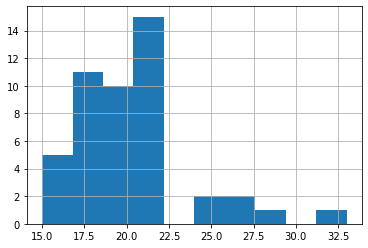

In [59]:
# Null Hypothesis
#  compact cars fuel-efficiency <= average car fuel-efficiency

# Alt Hypothesis
#  compact cars fuel-efficiency > average car fuel-efficiency

μ = mpg.fuel_efficiency.mean()

compact = mpg[mpg['class'] == 'compact'].fuel_efficiency

compact.hist()

In [60]:
t, p = stats.ttest_1samp(compact, μ)

t, p/2, α

(6.6191042534408915, 1.7008724108197003e-08, 0.05)

In [61]:
if p/2 < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

 We can reject he null hypothesis.


### Part 3

### Do manual cars get better gas mileage than automatic cars?

In [67]:
# Null Hypothesis
#  manual cars fuel_efficiency <= automatic cars fuel_efficiency

# Alt Hypothesis
#  manual cars fuel_efficiency <= automatic cars fuel_efficiency

fe_manual = mpg[mpg.trans.str.contains('manual')].fuel_efficiency
fe_auto = mpg[mpg.trans.str.contains('auto')].fuel_efficiency

<AxesSubplot:>

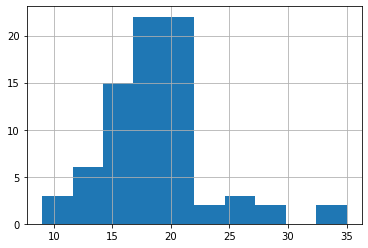

In [65]:
fe_manual.hist()

<AxesSubplot:>

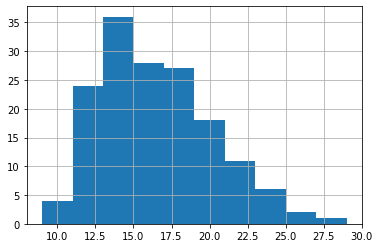

In [66]:
fe_auto.hist()

In [68]:
fe_auto.var() == fe_manual.var()

False

In [141]:
t, p = stats.ttest_ind(fe_auto, fe_manual, equal_var=False)

t, p, α

(-4.537543658735826, 1.2633643745317661e-05, 0.05)

In [142]:
if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')
r, p

 We can reject he null hypothesis.


(0.5352302262650253, 1.2633643745317661e-05)

# Correlation Exercise 1.a


Use the telco_churn data. Does tenure correlate with monthly charges?

 Total charges? 

 What happens if you control for phone and internet service?

In [3]:
telco = pd.read_csv('telcom_dataset.csv')
telco = telco.dropna()

telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 11 to 7048
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   object 
 1   gender                  7038 non-null   object 
 2   is_senior_citizen       7038 non-null   int64  
 3   partner                 7038 non-null   object 
 4   dependents              7038 non-null   object 
 5   phone_service           7038 non-null   int64  
 6   phone_service_name      7038 non-null   object 
 7   internet_service        7038 non-null   int64  
 8   internet_service_name   7038 non-null   object 
 9   contract_type           7038 non-null   int64  
 10  contract_name           7038 non-null   object 
 11  payment_type            7038 non-null   object 
 12  monthly_charges         7038 non-null   float64
 13  total_charges           7038 non-null   float64
 14  tenure                  7038 non-null  

### Use the telco_churn data. Does tenure correlate with monthly charges?

In [4]:
# Null Hypothesis
#  tenure and monthly charges are not linearly correlated

# Alt Hypothesis
#  tenure and monthly charges are linearly correlated

x = telco.tenure_months
y = telco.monthly_charges

r, p = stats.pearsonr(x, y)

print(f'The p-value of {(p)} lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of {round(r, 4)}.')

The p-value of 9.878909162394497e-98 lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of 0.2463.


# Correlation Exercise 1.b


### Use the telco_churn data. Does tenure correlate with total charges? 

In [5]:
# Null Hypothesis
#  tenure and total charges are not linearly correlated

# Alt Hypothesis
#  tenure and total charges are linearly correlated

x = telco.tenure_months
y = telco.total_charges

r, p = stats.pearsonr(x, y)

print(f'The p-value of {(p)} lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of {round(r, 4)}.')

The p-value of 0.0 lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of 0.8259.


# Correlation Exercise 1.c


### What happens if you control for phone and internet service?

In [6]:
telco.internet_service_name.value_counts()

Fiber Optic            3098
DSL                    2417
No Internet Service    1523
Name: internet_service_name, dtype: int64

In [7]:
telco.phone_service_name.value_counts()

One Line             3390
Two or More Lines    2967
No Phone Service      681
Name: phone_service_name, dtype: int64

In [8]:
telco['phone_internet'] = telco.phone_service_name + ' & ' + telco.internet_service_name

telco.phone_internet.value_counts()

Two or More Lines & Fiber Optic            1938
One Line & No Internet Service             1183
One Line & Fiber Optic                     1160
One Line & DSL                             1047
Two or More Lines & DSL                     689
No Phone Service & DSL                      681
Two or More Lines & No Internet Service     340
Name: phone_internet, dtype: int64

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


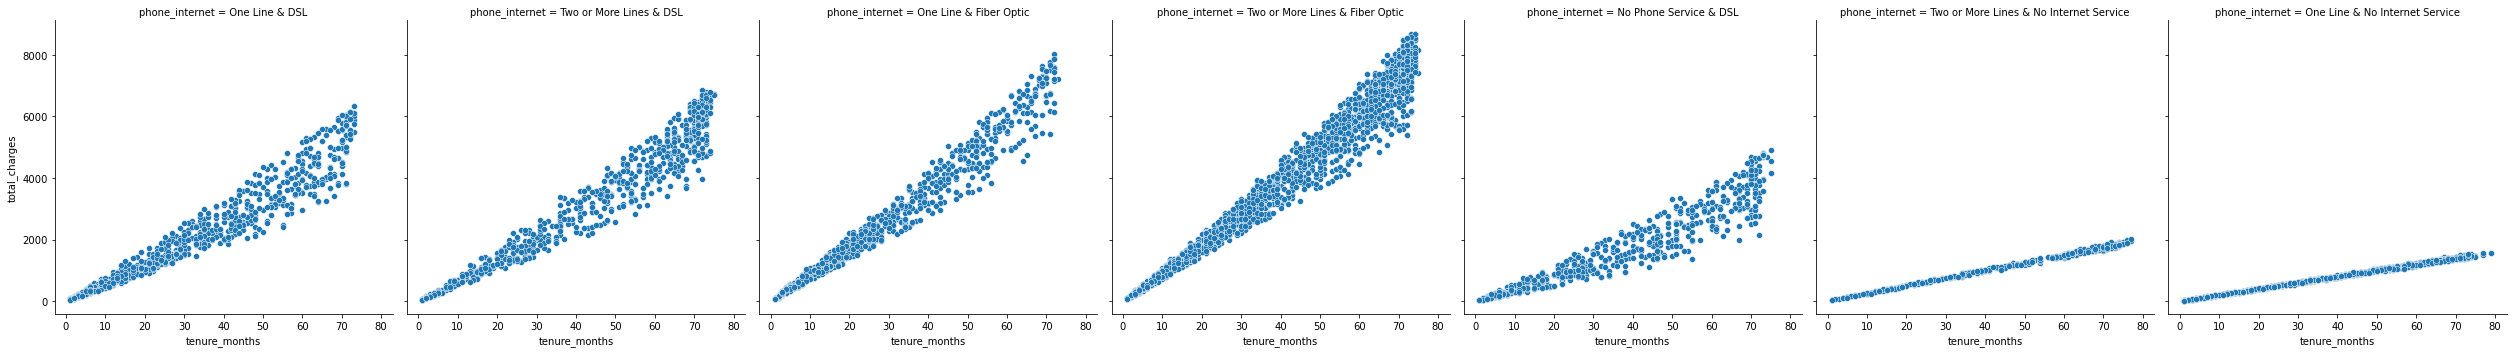

In [128]:
x = telco.tenure_months
y = telco.total_charges

sns.relplot(x, y, col=telco.phone_internet)

In [11]:
services = telco.phone_internet.value_counts().index

test_values = []

for service in services:
    subset = telco[telco.phone_internet == service]
    r, p = stats.pearsonr(x, y)
    result = {
        "service": service,
        "r": r,
        "p": p}
    test_values.append(result)

pd.DataFrame(test_values)

# Correcting for services provided would not have any change on the correlation

,service,r,p
0,Two or More Lines & Fiber Optic,0.825913,0.0
1,One Line & No Internet Service,0.825913,0.0
2,One Line & Fiber Optic,0.825913,0.0
3,One Line & DSL,0.825913,0.0
4,Two or More Lines & DSL,0.825913,0.0
5,No Phone Service & DSL,0.825913,0.0
6,Two or More Lines & No Internet Service,0.825913,0.0


# Correlation Exercise 2.a

Use the employees database.

   ### Is there a relationship between how long an employee has been with the company and their salary?


In [52]:
# Null Hypothesis
#  Salary and Employee Tenure are not linearly correlated

# Alt Hypothesis
#  Salary and Employee Tenure are linearly correlated

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

# make sure i grab right data, required a join 
    
query = '''
SELECT *, datediff(curdate(), hire_date) as tenure_days
FROM employees
JOIN salaries USING(emp_no)
WHERE to_date > NOW()
'''
df = pd.read_sql(query, url)

df.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,13025
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,13242
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,12962
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,12867
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,11851


In [53]:
r, p = stats.pearsonr(df.tenure_days, df.salary)

if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')
r, p

 We can reject he null hypothesis.


(0.3064625613186077, 0.0)

# Correlation Exercise 2.b

Use the employees database.

   ### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
# Null Hypothesis
#  Title Count and Employee Tenure are not linearly correlated

# Alt Hypothesis
#  Title Count and Employee Tenure are linearly correlated

# Correlation Exercise 3

Use the sleepstudy data. Is there a relationship between days and reaction time?

In [134]:
# Null Hypothesis
#  Reaction Time and Days are not linearly correlated

# Alt Hypothesis
#  Reaction Time and Days are linearly correlated

df = data('sleepstudy')
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [143]:
r, p = stats.pearsonr(df.Days, df.Reaction)

if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')
r, p

 We can reject he null hypothesis.


(0.5352302262650253, 9.894096322214812e-15)

# $Chi^2$



## Practice Exercise

In [13]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [16]:
observed = pd.crosstab(df.Attrition, df.Department)
observed

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [18]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[ 51 828 354]
 [ 12 133  92]]
---
Expected

[[ 52 806 374]
 [ 10 154  71]]
---

chi^2 = 10.7960
p     = 0.0045


# $Chi^2$ Exercise 1

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
    
                            Codeup Student 	Not Codeup Student
                Uses a Macbook     49                20
         Doesn't Use A Macbook 	   1            	 30

In [24]:
# Null Hypothesis
#  using a macbook and being a codeup student are dependant upon each other

# Alt Hypothesis
#  using a macbook and being a codeup student are independent of each other

index = ['uses_mac', 'no_mac']
columns = ['codeup_student', 'not_student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()


expected = pd.DataFrame([[.345, .155], [.345, .155]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

Observed
          codeup_student  not_student
uses_mac              49           20
no_mac                 1           30
---
Expected
          codeup_student  not_student
uses_mac            34.5         15.5
no_mac              34.5         15.5
---

chi^2 = 53.4942
p     = 0.0000
 We can reject he null hypothesis.


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000
 We can reject he null hypothesis.


# $Chi^2$ Exercise 2

### Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [33]:
# Null Hypothesis
#  transmission type and car class are not dependent upon each other

# Alt Hypothesis
#  transmission type and car class are independent upon each other

mpg = data('mpg')

mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto', 'Manual')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,Auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,Manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,Auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto


In [49]:
# tried using mpg.class originally, but kept getting a invalid syntax error
# talking with classmates, realized this is due to 'class' being a keyword as well

In [41]:
a = mpg.transmission_type
b = mpg.manufacturer

observed = pd.crosstab(a, b)

In [42]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

Observed

[[11 16 30 17  4  7  8  4  3  4  8  5  7 20 13]
 [ 7  3  7  8  5  7  0  0  0  0  5  0  7 14 14]]
---
Expected

[[12.07692308 12.74786325 24.82478632 16.77350427  6.03846154  9.39316239
   5.36752137  2.68376068  2.01282051  2.68376068  8.72222222  3.35470085
   9.39316239 22.81196581 18.11538462]
 [ 5.92307692  6.25213675 12.17521368  8.22649573  2.96153846  4.60683761
   2.63247863  1.31623932  0.98717949  1.31623932  4.27777778  1.64529915
   4.60683761 11.18803419  8.88461538]]
---

chi^2 = 29.2937
p     = 0.0095
 We can reject he null hypothesis.


# $Chi^2$ Exercise 3



#### Use the data from the employees database to answer these questions:

###    Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    


In [104]:
# Null Hypothesis
#  An employee's dept(sales and marketing) is dependent upon their gender
# Alt Hypothesis
#  An employee's dept(sales and marketing) is independent upon their gender

query = '''SELECT e.gender, d.dept_name
FROM employees e
JOIN dept_emp de ON de.emp_no = e.emp_no
AND to_date > curdate()
JOIN departments d USING(dept_no)
'''


# had a bit of trouble putting this query together


df = pd.read_sql(query, url)

df.head()

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service


In [106]:
df = df[(df.dept_name == 'Sales') | (df.dept_name == 'Marketing')]

observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [99]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692
 Due to p being greater than α, the null hypothesis stands.


###    Is an employee's gender independent of whether or not they are or have been a manager?

In [109]:
# Null Hypothesis
#  An employee's likelyhood to be a manager is dependent upon gender
# Alt Hypothesis
#  An employee's likelyhood to be a manager is independent upon gender

query = '''SELECT emp_no, gender, dept_no
FROM employees
LEFT JOIN dept_manager USING(emp_no)'''

df = pd.read_sql(query, url)

df.head()

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None


In [110]:
df = df.rename(columns={'dept_no': 'is_manager'}).fillna(0)
df.head()

,emp_no,gender,is_manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0


In [111]:
observed = pd.crosstab(df['gender'], df['is_manager'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

Observed

[[120038      0      1      2      2      1      3      0      1      3]
 [179962      2      1      0      2      1      1      2      1      1]]
---
Expected

[[1.20041397e+05 8.00275978e-01 8.00275978e-01 8.00275978e-01
  1.60055196e+00 8.00275978e-01 1.60055196e+00 8.00275978e-01
  8.00275978e-01 1.60055196e+00]
 [1.79958603e+05 1.19972402e+00 1.19972402e+00 1.19972402e+00
  2.39944804e+00 1.19972402e+00 2.39944804e+00 1.19972402e+00
  1.19972402e+00 2.39944804e+00]]
---

chi^2 = 10.1618
p     = 0.3376
 Due to p being greater than α, the null hypothesis stands.
